In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import chardet
import datetime
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classifier/classifier.pkl
/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [2]:
#using chardet to see if there is anytype of enconding involved
with open("../input/lending-club/accepted_2007_to_2018Q4.csv.gz", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)    

{'encoding': None, 'confidence': 0.0, 'language': None}


In [3]:
accepted=pd.read_csv("../input/lending-club/accepted_2007_to_2018Q4.csv.gz",low_memory=False)
rejected=pd.read_csv("../input/lending-club/rejected_2007_to_2018Q4.csv.gz",low_memory=False)
np.random.seed(0) 

In [4]:
accepted.shape

(2260701, 151)

# Data Cleaning for Both "Accepted" dataset

In [5]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [7]:
accepted.info

<bound method DataFrame.info of                                                        id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600

In [8]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


## Cleaning Dataset

In [9]:
accepted.isnull().sum(axis=0)

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [10]:
accepted.info(verbose=True, null_counts=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

In [11]:
accepted = accepted.drop(['member_id'], axis=1)

In [12]:
missing = round(100*(accepted.isnull().sum()/len(accepted.id)), 2)
missing.loc[missing > 0]
#Percentage of missing values per column

emp_title                 7.39
emp_length                6.50
desc                     94.42
title                     1.03
dti                       0.08
                         ...  
settlement_status        98.49
settlement_date          98.49
settlement_amount        98.49
settlement_percentage    98.49
settlement_term          98.49
Length: 101, dtype: float64

In [13]:
missing.sort_values(ascending=False)

orig_projected_additional_accrued_interest    99.62
hardship_end_date                             99.52
hardship_start_date                           99.52
hardship_type                                 99.52
hardship_reason                               99.52
                                              ...  
revol_bal                                      0.00
pub_rec                                        0.00
open_acc                                       0.00
inq_last_6mths                                 0.00
id                                             0.00
Length: 150, dtype: float64

In [14]:
drop_columns = sorted(list(missing[missing > 30].index))
drop_columns

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc

In [15]:
len(drop_columns)

57

In [16]:
accepted = accepted.drop(labels=drop_columns,axis=1)

In [17]:
accepted.shape

(2260701, 93)

In [18]:
accepted.isnull().sum()

id                                0
loan_amnt                        33
funded_amnt                      33
funded_amnt_inv                  33
term                             33
                              ...  
total_bc_limit                50063
total_il_high_credit_limit    70309
hardship_flag                    33
disbursement_method              33
debt_settlement_flag             33
Length: 93, dtype: int64

In [19]:
accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [20]:
accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [21]:
accepted = accepted.loc[accepted['loan_status'].isin(['Fully Paid','Charged Off'])]
accepted['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [22]:
accepted_clean = accepted
accepted_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


# "Accepted" data analysis

In [23]:
#We know that there are 2 loan status:
accepted_clean['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

## Creating a Pie Chart for Loan status

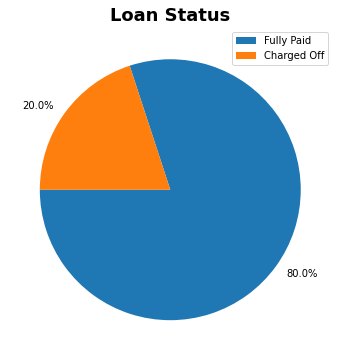

In [24]:
# Converting number of values in loan_status column to percentages:
total = accepted_clean['loan_status'].value_counts(dropna=False).sum()
status = [accepted_clean['loan_status'].value_counts(dropna=False)[0], accepted_clean['loan_status'].value_counts(dropna=False)[1]]
fully_paid_percent = round((status[0]*100)/total,0)
charge_off_percent = round((status[1]*100)/total,0)
percent = [str(fully_paid_percent)+"%",str(charge_off_percent)+"%"]
# Creating Pie Chart for loan_status column:
plt.figure(figsize=(12,6))
plt.title('Loan Status', fontsize=18, fontweight='bold')
plt.pie(accepted_clean['loan_status'].value_counts(dropna=False),labels=percent, startangle=180)
plt.legend(['Fully Paid', 'Charged Off'], loc='best')

## Barplot for loan Status

Text(0.5, 0, 'Count')

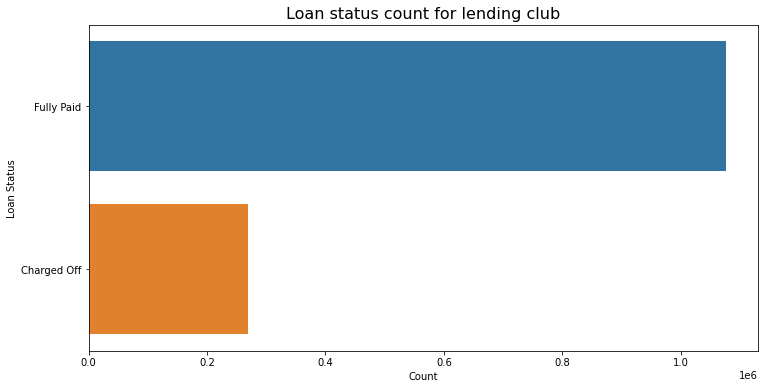

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(y=accepted_clean['loan_status'].value_counts(dropna=False).index, x=accepted_clean['loan_status'].value_counts(dropna=False))
plt.title("Loan status count for lending club", fontsize=16)
plt.ylabel('Loan Status')
plt.xlabel('Count')

## Barplot for the loan status w.r.t loan amounts

In [26]:
accepted_clean.loan_amnt

0           3600.0
1          24700.0
2          20000.0
4          10400.0
5          11950.0
            ...   
2260688    18000.0
2260690    29400.0
2260691    32000.0
2260692    16000.0
2260697    24000.0
Name: loan_amnt, Length: 1345310, dtype: float64

In [27]:
#Categorizing them according to charged off and Fully Paid:
categorized_loan_amnt = accepted_clean.groupby('loan_status')['loan_amnt'].sum()
categorized_loan_amnt.sum()/(1e6)

19399.33255

In [28]:
#Converting values to millions of dollars:
categorized_loan_amnt_str=[]
categorized_loan_amnt_str_0 = "$"+str(round(categorized_loan_amnt[0]/(1e9),2))+"bn"
categorized_loan_amnt_str_1 = "$"+str(round(categorized_loan_amnt[1]/(1e9),2))+"bn"
categorized_loan_amnt_str = [categorized_loan_amnt_str_0, categorized_loan_amnt_str_1]
categorized_loan_amnt_str

['$4.18bn', '$15.22bn']

Text(0, 0.5, 'Count in dollars')

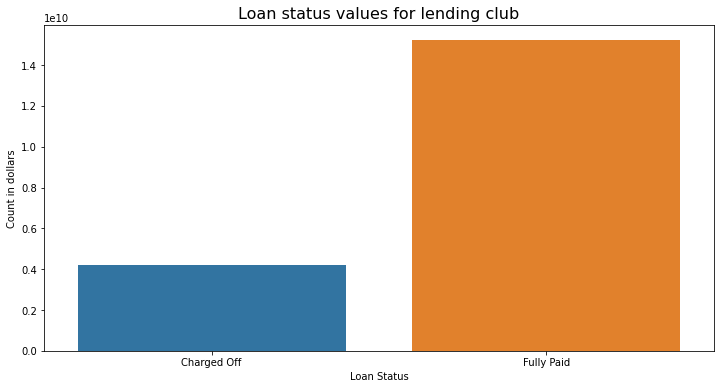

In [29]:
#Bulding Barplot For status as per amount:
plt.figure(figsize=(12,6))
sns.barplot(x=categorized_loan_amnt.index, y=categorized_loan_amnt)
plt.title("Loan status values for lending club", fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('Count in dollars')

## Pie Chart for for the same in billions of dollars

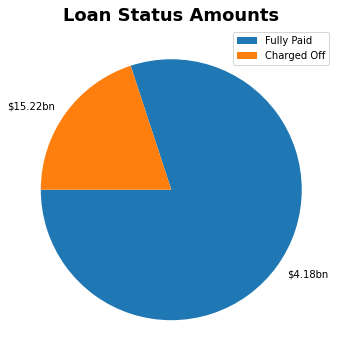

In [30]:
#Pie chart for value in =billions of dollars
plt.figure(figsize=(12,6))
plt.title('Loan Status Amounts', fontsize=18, fontweight='bold')
plt.pie(accepted_clean['loan_status'].value_counts(dropna=False),labels=categorized_loan_amnt_str, startangle=180)
plt.legend(['Fully Paid', 'Charged Off'], loc='best')

In [31]:
accepted_clean[['int_rate','installment']]

,int_rate,installment
0,13.99,123.03
1,11.99,820.28
2,10.78,432.66
4,22.45,289.91
5,13.44,405.18
...,...,...
2260688,9.49,377.95
2260690,13.99,683.94
2260691,14.49,752.74
2260692,12.79,362.34


In [32]:
accepted_clean.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'a

In [33]:
accepted_clean[['funded_amnt_inv','term']]

,funded_amnt_inv,term
0,3600.0,36 months
1,24700.0,36 months
2,20000.0,60 months
4,10400.0,60 months
5,11950.0,36 months
...,...,...
2260688,18000.0,60 months
2260690,29400.0,60 months
2260691,32000.0,60 months
2260692,16000.0,60 months


In [34]:
funded_amnt = accepted_clean['funded_amnt_inv']
term = accepted_clean['term']

## Plots on different terms and the amount funded

In [35]:
term_1 = term.unique()

Text(0.5, 1.0, 'Plot of Funded amount w.r.t Categorized months(terms)')

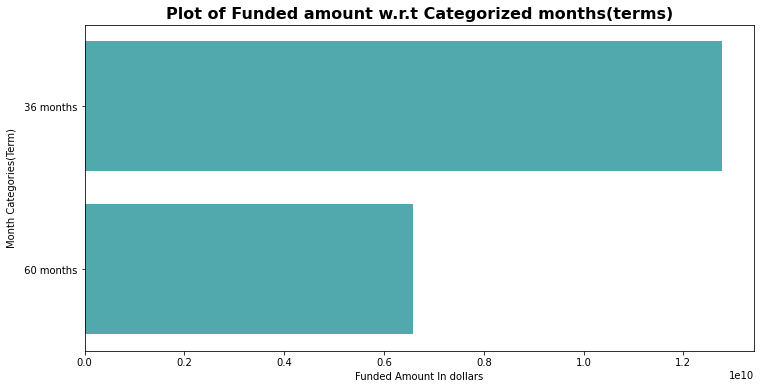

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(y=term_1, x=accepted_clean.groupby('term').sum()['funded_amnt_inv'], color='#42b7bd')
plt.xlabel('Funded Amount In dollars')
plt.ylabel('Month Categories(Term)')
plt.title('Plot of Funded amount w.r.t Categorized months(terms)', fontsize=16, fontweight='bold')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Loan Status')

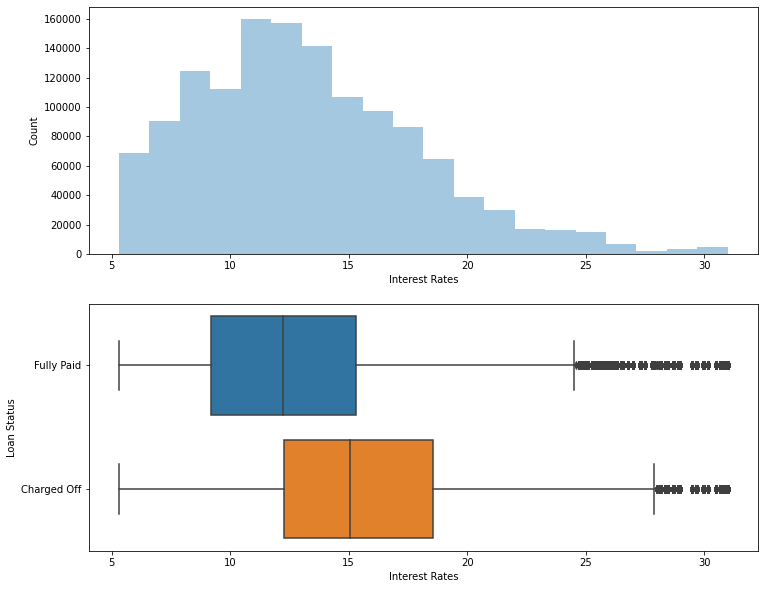

In [37]:
fig,[ax1,ax2] = plt.subplots(ncols=1, nrows=2, figsize=(12,10))
sns.distplot(ax=ax1, a=accepted_clean['int_rate'], bins=20, kde=False)
ax1.set_xlabel('Interest Rates')
ax1.set_ylabel('Count')
sns.boxplot(ax=ax2, x=accepted_clean['int_rate'], y=accepted_clean['loan_status'])
ax2.set_xlabel('Interest Rates')
ax2.set_ylabel('Loan Status')

## Box And Bar plot of installment v/s Grade

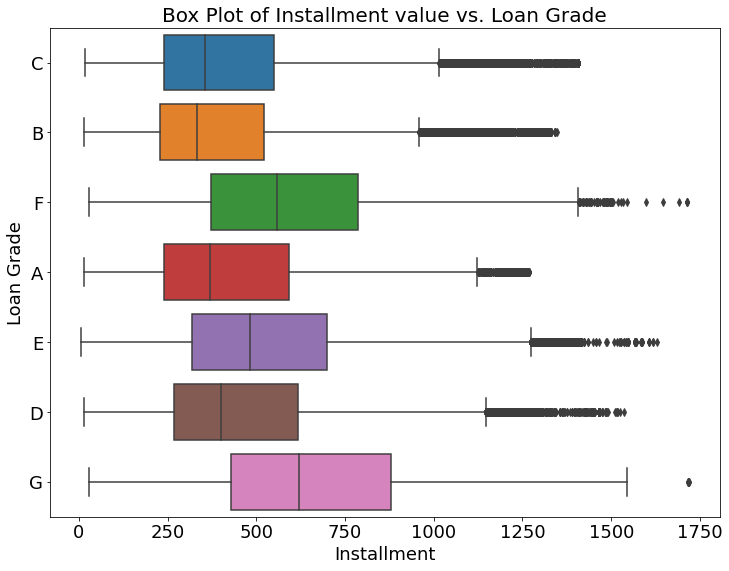

In [38]:
plt.figure(figsize=(12,9))
sns.boxplot(x="installment", y="grade", data=accepted_clean)
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=20)
plt.xlabel('Installment', fontsize=18)
plt.ylabel('Loan Grade', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [39]:
gr = accepted_clean['grade'].value_counts(dropna=False)

Text(0.5, 0, 'Count')

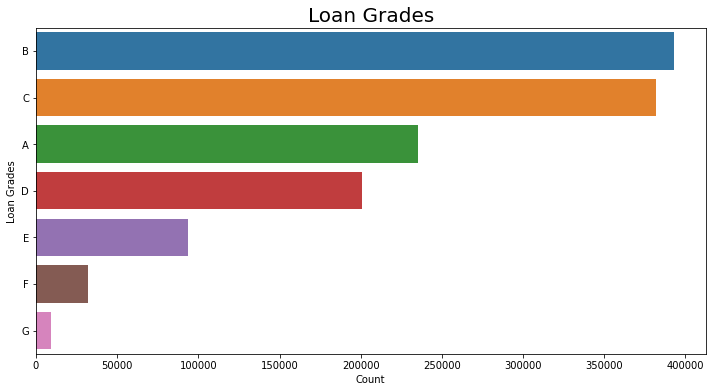

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=gr,y=gr.index)
plt.title('Loan Grades', fontsize=20)
plt.ylabel('Loan Grades', fontsize=10)
plt.xlabel('Count', fontsize=10)